In [2]:
import pandas as pd
import numpy as np
import nltk
import re

#nltk.download('punkt')
from nltk.tokenize import word_tokenize, sent_tokenize

#nltk.download('stopwords')
from nltk.corpus import stopwords 

from nltk.stem.porter import PorterStemmer

from sklearn.feature_extraction.text import CountVectorizer

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.svm import SVC as SVM

In [32]:
import pickle

In [3]:
import string
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [4]:
from nltk.corpus import wordnet
from collections import Counter

In [5]:
from sklearn.model_selection import GridSearchCV

In [6]:
from nltk.stem import WordNetLemmatizer 
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [7]:
data = pd.read_csv("dataset.csv")

In [8]:
data["sentiment"][data["sentiment"] == "negative"] = 0
data["sentiment"][data["sentiment"] == "positive"] = 1

In [9]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
def analysis(labels, predictions):
    print( "Report: classification\n", classification_report(labels, predictions, target_names=["positive", "negative"]))
    print( "Matrix: confusion\n", confusion_matrix(labels, predictions))
    print( "Accuracy\n", accuracy_score(labels, predictions))

In [9]:
data

,comment,sentiment
0,"Oh my god, it just doesn't get any worse than ...",0
1,If you're a layman interested in quantum theor...,0
2,It's amazing that this no talent actor Chapa g...,0
3,This must be one of the most overrated Spanish...,0
4,Some critics have compared Chop Shop with the ...,1
...,...,...
44995,I appreciate movies like this: smart and well-...,1
44996,It's rare that I sit down in front of the TV s...,1
44997,I was bored one night and Red Eye was on and t...,1
44998,"""Three"" is a seriously dumb shipwreck movie. M...",0


In [10]:
y = data["sentiment"]
y = y.to_numpy()

In [11]:
# split train and test data
X_train, X_test, y_train, y_test = train_test_split(data["comment"], y)

In [11]:
def no_pre(text):
    return text

In [127]:
# creating the feature matrix 
matrix_pp1 = CountVectorizer(max_features=2000, preprocessor=no_pre)
X_train_pp1 = matrix_pp1.fit_transform(X_train).toarray()

In [128]:
results = pd.DataFrame(X_train_pp1, columns=matrix_pp1.get_feature_names())
results

,000,10,100,11,12,13,15,20,30,40,...,years,yes,yet,you,young,younger,your,yourself,zombie,zombies
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,4,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,1,0,...,1,0,0,4,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,2,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33745,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
33746,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
33747,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
33748,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0


In [129]:
# creating the feature matrix has stop words
matrix_pp2 = CountVectorizer(max_features=2000, token_pattern='[a-zA-Z]{3,}', preprocessor=remove_numbers)
X_train_pp2 = matrix_pp2.fit_transform(X_train).toarray()

In [130]:
results = pd.DataFrame(X_train_pp2, columns=matrix_pp2.get_feature_names())
results

,ability,able,about,above,absolute,absolutely,absurd,academy,accent,accept,...,york,you,young,younger,your,yourself,youth,zero,zombie,zombies
0,0,0,0,0,0,0,0,0,0,0,...,0,4,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,5,0,0,0,0,0,0,0,...,0,7,0,1,0,0,0,0,0,0
4,0,1,2,0,0,0,0,0,0,0,...,0,2,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33745,0,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
33746,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
33747,0,0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
33748,0,0,1,0,0,1,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0


In [131]:
# creating the feature matrix 
# matrix = CountVectorizer(max_features=1500)
X_test_pp2 = matrix_pp2.transform(X_test).toarray()

In [132]:
# creating the feature matrix 
# matrix = CountVectorizer(max_features=1500)
X_test_pp1 = matrix_pp1.transform(X_test).toarray()

In [12]:
X_train_3 = pd.DataFrame(X_train)
X_test_3 = pd.DataFrame(X_test)

In [13]:
cnt = Counter()
for text in X_train_3["comment"].values:
    for word in text.split():
        cnt[word] += 1
        
cnt.most_common(10)

[('the', 385837),
 ('a', 207895),
 ('and', 203905),
 ('of', 192072),
 ('to', 177830),
 ('is', 137864),
 ('in', 115153),
 ('I', 90281),
 ('that', 85989),
 ('this', 77199)]

In [14]:
FREQWORDS = set([w for (w, wc) in cnt.most_common(10)])
def remove_freqwords(text):
    """custom function to remove the frequent words"""
    return " ".join([word for word in str(text).split() if word not in FREQWORDS])

In [15]:
PUNCT_TO_REMOVE = string.punctuation
def remove_punctuation(text):
    """custom function to remove the punctuation"""
    return text.translate(str.maketrans('', '', PUNCT_TO_REMOVE))

from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer()
def stem_words(text):
    return " ".join([stemmer.stem(word) for word in text.split()])
lemmatizer = WordNetLemmatizer()
wordnet_map = {"N":wordnet.NOUN, "V":wordnet.VERB, "J":wordnet.ADJ, "R":wordnet.ADV}
def lemmatize_words(text):
    pos_tagged_text = nltk.pos_tag(text.split())
    return " ".join([lemmatizer.lemmatize(word, wordnet_map.get(pos[0], wordnet.NOUN)) for word, pos in pos_tagged_text])
def remove_numbers(text):
    text = text.lower()
    text = re.sub("^\d+\s|\s\d+\s|\s\d+$", " ", text)
    return text
def remove_emoji(string):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)
def remove_urls(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.sub(r'', text)

In [16]:
# # Remove none alphabetic characters, Lower case, Remove numbers and useless characters, tokenize
# # stemmer, lemmetizer, stopwords
def complete_preprocess(X_train, mode="train"):
    X_train["comment"] = X_train["comment"].apply(lambda text: remove_punctuation(text))
    X_train["comment"] = X_train["comment"].apply(lambda text: stem_words(text))
    #X_train["comment"] = X_train["comment"].apply(lambda text: lemmatize_words(text))
    print("p")
    X_train["comment"] = X_train["comment"].apply(lambda text: remove_numbers(text))
    X_train["comment"] = X_train["comment"].apply(lambda text: remove_emoji(text))
    X_train["comment"] = X_train["comment"].apply(lambda text: remove_urls(text))
    #if mode == "train":
    X_train["comment"] = X_train["comment"].apply(lambda text: remove_freqwords(text))
    #X_train.head()
    return X_train["comment"]
# for i in X_test.keys():
#     X_test[i] = stemSentence(X_test[i])

In [17]:
X_train_3["comment"] = complete_preprocess(X_train_3)

p


In [18]:
X_test_3["comment"] = complete_preprocess(X_test_3)

p


In [21]:
# creating the feature matrix 
matrix_pp3 = CountVectorizer(max_features=500, 
                        stop_words = 'english',
                        lowercase = True,
#                         token_pattern='[a-zA-Z]{3,}',
                       )
X_train_pp3 = matrix_pp3.fit_transform(X_train_3["comment"]).toarray()

In [22]:
results = pd.DataFrame(X_train_pp3, columns=matrix_pp3.get_feature_names())
results

,abl,absolut,act,action,actor,actress,actual,add,age,ago,...,wouldnt,write,writer,written,wrong,ye,year,youll,young,zombi
0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,2,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33745,1,0,0,0,1,0,0,0,0,0,...,1,0,0,1,0,1,0,0,0,0
33746,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
33747,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
33748,1,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0


In [23]:
X_test_pp3 = matrix_pp3.transform(X_test_3["comment"]).toarray()

In [133]:
clf_1 = LogisticRegression(max_iter=1000)
clf_1.fit(X_train_pp1,y_train.astype("int"))
preds = clf_1.predict(X_test_pp1)
analysis(preds, y_test.astype("int"))

Report: classification
               precision    recall  f1-score   support

    positive       0.86      0.88      0.87      5463
    negative       0.88      0.86      0.87      5787

    accuracy                           0.87     11250
   macro avg       0.87      0.87      0.87     11250
weighted avg       0.87      0.87      0.87     11250

Matrix: confusion
 [[4812  651]
 [ 816 4971]]
Accuracy
 0.8696


In [134]:
clf = LogisticRegression(max_iter=1000)
clf.fit(X_train_pp2,y_train.astype
        ("int"))
preds = clf.predict(X_test_pp2)
analysis(preds, y_test.astype("int"))

Report: classification
               precision    recall  f1-score   support

    positive       0.86      0.88      0.87      5510
    negative       0.88      0.86      0.87      5740

    accuracy                           0.87     11250
   macro avg       0.87      0.87      0.87     11250
weighted avg       0.87      0.87      0.87     11250

Matrix: confusion
 [[4842  668]
 [ 786 4954]]
Accuracy
 0.8707555555555555


In [139]:
clf = LogisticRegression(max_iter=1000)
clf.fit(X_train_pp3,y_train.astype("int"))
preds = clf.predict(X_test_pp3)
analysis(preds, y_test.astype("int"))

Report: classification
               precision    recall  f1-score   support

    positive       0.86      0.87      0.87      5521
    negative       0.88      0.86      0.87      5729

    accuracy                           0.87     11250
   macro avg       0.87      0.87      0.87     11250
weighted avg       0.87      0.87      0.87     11250

Matrix: confusion
 [[4824  697]
 [ 804 4925]]
Accuracy
 0.8665777777777778


In [ ]:
parameters = {'kernel':('linear', 'rbf', 'poly'), 'C':[1, 10]}
clf = GridSearchCV(SVM(), parameters)
clf.fit(X_train_pp1,y_train.astype("int"))

In [78]:
# clf = SVM(kernel="poly")
# clf.fit(X_train_pp1,y_train.astype("int"))
# print("testing")
pred = clf.predict(X_test_pp1)
analysis(y_test.astype("int"), pred)

testing
Report: classification
               precision    recall  f1-score   support

    positive       0.87      0.67      0.75      5611
    negative       0.73      0.90      0.81      5639

    accuracy                           0.78     11250
   macro avg       0.80      0.78      0.78     11250
weighted avg       0.80      0.78      0.78     11250

Matrix: confusion
 [[3738 1873]
 [ 560 5079]]
Accuracy
 0.7837333333333333


In [149]:
clf = SVM(kernel="poly")
clf.fit(X_train_pp3,y_train.astype("int"))
print("testing")
pred = clf.predict(X_test_pp3)
analysis(y_test.astype("int"), pred)

testing
Report: classification
               precision    recall  f1-score   support

    positive       0.90      0.59      0.71      5628
    negative       0.69      0.93      0.80      5622

    accuracy                           0.76     11250
   macro avg       0.80      0.76      0.75     11250
weighted avg       0.80      0.76      0.75     11250

Matrix: confusion
 [[3307 2321]
 [ 380 5242]]
Accuracy
 0.7599111111111111


In [80]:
clf = SVM(kernel="poly")
clf.fit(X_train_pp2,y_train.astype("int"))
print("testing")
pred = clf.predict(X_test_pp2)
analysis(y_test.astype("int"), pred)

testing
Report: classification
               precision    recall  f1-score   support

    positive       0.87      0.66      0.75      5611
    negative       0.73      0.90      0.80      5639

    accuracy                           0.78     11250
   macro avg       0.80      0.78      0.78     11250
weighted avg       0.80      0.78      0.78     11250

Matrix: confusion
 [[3700 1911]
 [ 554 5085]]
Accuracy
 0.7808888888888889


In [140]:
neigh = KNN()
neigh.fit(X_train_pp3, y_train.astype("int"))

KNeighborsClassifier()

In [141]:
neigh_1 = KNN()
neigh_1.fit(X_train_pp1, y_train.astype("int"))

KNeighborsClassifier()

In [142]:
neigh_2 = KNN()
neigh_2.fit(X_train_pp2, y_train.astype("int"))

KNeighborsClassifier()

In [143]:
predicts_2 = neigh_2.predict(X_test_pp2)

In [144]:
predicts = neigh.predict(X_test_pp3)

In [145]:
predicts_1 = neigh_1.predict(X_test_pp1)

In [146]:
analysis(y_test.astype("int"), predicts_2)

Report: classification
               precision    recall  f1-score   support

    positive       0.68      0.55      0.61      5628
    negative       0.62      0.74      0.67      5622

    accuracy                           0.64     11250
   macro avg       0.65      0.64      0.64     11250
weighted avg       0.65      0.64      0.64     11250

Matrix: confusion
 [[3098 2530]
 [1479 4143]]
Accuracy
 0.6436444444444445


In [147]:
analysis(y_test.astype("int"), predicts_1)

Report: classification
               precision    recall  f1-score   support

    positive       0.65      0.52      0.58      5628
    negative       0.60      0.73      0.66      5622

    accuracy                           0.62     11250
   macro avg       0.63      0.62      0.62     11250
weighted avg       0.63      0.62      0.62     11250

Matrix: confusion
 [[2912 2716]
 [1539 4083]]
Accuracy
 0.6217777777777778


In [148]:
analysis(y_test.astype("int"), predicts)

Report: classification
               precision    recall  f1-score   support

    positive       0.63      0.70      0.66      5628
    negative       0.66      0.59      0.62      5622

    accuracy                           0.64     11250
   macro avg       0.65      0.64      0.64     11250
weighted avg       0.65      0.64      0.64     11250

Matrix: confusion
 [[3926 1702]
 [2297 3325]]
Accuracy
 0.6445333333333333


In [ ]:
# stemmer = PorterStemmer()
# def stemming_tokenizer(str_input):
#     sent = re.sub(r"[^A-Za-z]{3, }", " ", str_input)
#     words = word_tokenize(sent)
#     words = [stemmer.stem(word) for word in words]
#     return words

In [36]:
from nltk.tokenize import word_tokenize

In [37]:
x = X_train_3["comment"].to_numpy()

In [38]:
x_test = X_test_3["comment"].to_numpy()

In [39]:
xx_vw = [] #each row is a sentence with its words are tokenized for train data
for i in range(0, len(x)):
    xx_vw.append(word_tokenize(x[i]))

In [40]:
from gensim.models import Word2Vec
mod = Word2Vec(xx_vw, window=5, min_count=1, workers=4)
model_vw = mod.train(xx_vw, epochs=100, total_examples=len(xx_vw))

C:\Users\USER\anaconda3\lib\site-packages\gensim\similarities\__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


In [41]:
# create vector of each row of data! by summing the vector of each word in that row

final_x_wv = [] #contatining the vectors of each rows of train data
for i in range(0, len(xx_vw)):
    v = np.zeros((100, 1))
    for j in range(0, len(xx_vw[i])): 
        v = v + mod.wv.get_vector(xx_vw[i][j]).reshape((100, 1)) 

    t = np.array(v)
    t = t.astype("float64") 
    final_x_wv.append(t)

In [42]:
xx_vw_test = [] #each row is a sentence with its words are tokenized for train data
for i in range(0, len(x_test)):
    xx_vw_test.append(word_tokenize(x_test[i]))

In [43]:
# create vector of each row of the test data! by summing the vector of each word in that row

final_x_vw_test = [] #contatining the vectors of each rows of test data
for i in range(0, len(xx_vw_test)):
    v = np.zeros((100, 1))
    for j in range(0, len(xx_vw_test[i])): 
        if xx_vw_test[i][j] in mod.wv.index_to_key:
            v = v + mod.wv.get_vector(xx_vw_test[i][j]).reshape((100, 1)) 

    t = np.array(v)
    t = t.astype("float64") 
    final_x_vw_test.append(t)

In [44]:
final_x_wv = np.array(final_x_wv)

In [45]:
final_x_wv = np.squeeze(final_x_wv, 2)

In [46]:
final_x_vw_test = np.squeeze(final_x_vw_test, 2)

In [47]:
final_x_wv.shape

(33750, 100)

In [30]:
clf = SVM(kernel="poly")
clf.fit(final_x_wv,y_train.astype("int"))

SVC(kernel='poly')

In [37]:
preds = clf.predict(final_x_vw_test)
acc = accuracy_score(y_test.astype("int"), preds)
acc

0.8063111111111111

In [24]:
parameters = [{'kernel':'rbf', 'C':0.1}, {'kernel':'rbf', 'C':1}, {'kernel':'rbf', 'C':10}, {'kernel':'poly', 'C':0.1}, {'kernel':'poly', 'C':1}, {'kernel':'poly', 'C':10}]

In [52]:
parameters[0]["C"]

0.1

In [38]:
kernel = ['poly', 'rbf']

In [26]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=6)
i = 0
total_acc = 0
best_kernel = " "
C = 0
# kf.get_n_splits(final_x_wv)
for train_index, test_index in kf.split(X_train_pp3):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_t, X_val = X_train_pp3[train_index], X_train_pp3[test_index]
    y_t, y_val = y_train[train_index], y_train[test_index]
    print("start to train")
    clf = SVM(kernel=parameters[i]["kernel"], C=parameters[i]["C"])
    clf.fit(X_t,y_t.astype("int"))
    print("finished training")
    preds = clf.predict(X_val)
    acc = accuracy_score(y_val.astype("int"), preds)
    print("the accuracy is:", acc)
    if acc > total_acc:
        best_kernel = parameters[i]["kernel"]
        total_acc = acc
        C = parameters[i]["C"]
    i = i + 1

print("the best kernel is:", best_kernel) 

TRAIN: [ 5625  5626  5627 ... 33747 33748 33749] TEST: [   0    1    2 ... 5622 5623 5624]
start to train
finished training
the accuracy is: 0.8065777777777777
TRAIN: [    0     1     2 ... 33747 33748 33749] TEST: [ 5625  5626  5627 ... 11247 11248 11249]
start to train
finished training
the accuracy is: 0.8439111111111111
TRAIN: [    0     1     2 ... 33747 33748 33749] TEST: [11250 11251 11252 ... 16872 16873 16874]
start to train
finished training
the accuracy is: 0.8355555555555556
TRAIN: [    0     1     2 ... 33747 33748 33749] TEST: [16875 16876 16877 ... 22497 22498 22499]
start to train
finished training
the accuracy is: 0.7032888888888889
TRAIN: [    0     1     2 ... 33747 33748 33749] TEST: [22500 22501 22502 ... 28122 28123 28124]
start to train
finished training
the accuracy is: 0.7708444444444444
TRAIN: [    0     1     2 ... 28122 28123 28124] TEST: [28125 28126 28127 ... 33747 33748 33749]
start to train
finished training
the accuracy is: 0.8094222222222223
the best k

In [27]:
clf = SVM(kernel=best_kernel, C=C)
clf.fit(X_train_pp3,y_train.astype("int"))
preds = clf.predict(X_test_pp3)
analysis(preds, y_test.astype("int"))

Report: classification
               precision    recall  f1-score   support

    positive       0.83      0.85      0.84      5460
    negative       0.86      0.84      0.85      5790

    accuracy                           0.85     11250
   macro avg       0.85      0.85      0.85     11250
weighted avg       0.85      0.85      0.85     11250

Matrix: confusion
 [[4637  823]
 [ 917 4873]]
Accuracy
 0.8453333333333334


In [55]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=6)
i = 0
total_acc = 0
best_kernel = " "
C = 0
# kf.get_n_splits(final_x_wv)
for train_index, test_index in kf.split(final_x_wv):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_t, X_val = final_x_wv[train_index], final_x_wv[test_index]
    y_t, y_val = y_train[train_index], y_train[test_index]
    print("start to train")
    clf = SVM(kernel=parameters[i]["kernel"], C=parameters[i]["C"])
    clf.fit(X_t,y_t.astype("int"))
    print("finished training")
    preds = clf.predict(X_val)
    acc = accuracy_score(y_val.astype("int"), preds)
    print("the accuracy is:", acc)
    if acc > total_acc:
        best_kernel = parameters[i]["kernel"]
        total_acc = acc
        C = parameters[i]["C"]
    i = i + 1

print("the best kernel is:", best_kernel) 

TRAIN: [ 5625  5626  5627 ... 33747 33748 33749] TEST: [   0    1    2 ... 5622 5623 5624]
start to train
finished training
the accuracy is: 0.8538666666666667
TRAIN: [    0     1     2 ... 33747 33748 33749] TEST: [ 5625  5626  5627 ... 11247 11248 11249]
start to train
finished training
the accuracy is: 0.8700444444444444
TRAIN: [    0     1     2 ... 33747 33748 33749] TEST: [11250 11251 11252 ... 16872 16873 16874]
start to train
finished training
the accuracy is: 0.8688
TRAIN: [    0     1     2 ... 33747 33748 33749] TEST: [16875 16876 16877 ... 22497 22498 22499]
start to train
finished training
the accuracy is: 0.7489777777777777
TRAIN: [    0     1     2 ... 33747 33748 33749] TEST: [22500 22501 22502 ... 28122 28123 28124]
start to train
finished training
the accuracy is: 0.8149333333333333
TRAIN: [    0     1     2 ... 28122 28123 28124] TEST: [28125 28126 28127 ... 33747 33748 33749]
start to train
finished training
the accuracy is: 0.8357333333333333
the best kernel is: rb

In [56]:
clf = SVM(kernel=best_kernel, C=C)
clf.fit(final_x_wv,y_train.astype("int"))
preds = clf.predict(final_x_vw_test)
analysis(preds, y_test.astype("int"))

Report: classification
               precision    recall  f1-score   support

    positive       0.86      0.86      0.86      5540
    negative       0.87      0.86      0.86      5710

    accuracy                           0.86     11250
   macro avg       0.86      0.86      0.86     11250
weighted avg       0.86      0.86      0.86     11250

Matrix: confusion
 [[4775  765]
 [ 779 4931]]
Accuracy
 0.8627555555555556


In [57]:
filename = 'SVM.sav'
pickle.dump(clf, open(filename, 'wb'))

In [162]:
clf_1 = LogisticRegression(max_iter=1000, warm_start=True)
clf_1.fit(final_x_wv,y_train.astype("int"))
preds = clf_1.predict(final_x_vw_test)
analysis(preds, y_test.astype("int"))

Report: classification
               precision    recall  f1-score   support

    positive       0.86      0.86      0.86      5508
    negative       0.87      0.86      0.86      5742

    accuracy                           0.86     11250
   macro avg       0.86      0.86      0.86     11250
weighted avg       0.86      0.86      0.86     11250

Matrix: confusion
 [[4754  754]
 [ 800 4942]]
Accuracy
 0.8618666666666667


In [160]:
filename = 'LogisticRegression.sav'
pickle.dump(clf_1, open(filename, 'wb'))

In [31]:
clf = LogisticRegression(max_iter=1000)
clf.fit(X_train_pp3,y_train.astype("int"))
preds = clf.predict(X_test_pp3)
analysis(preds, y_test.astype("int"))

Report: classification
               precision    recall  f1-score   support

    positive       0.84      0.85      0.84      5516
    negative       0.85      0.85      0.85      5734

    accuracy                           0.85     11250
   macro avg       0.85      0.85      0.85     11250
weighted avg       0.85      0.85      0.85     11250

Matrix: confusion
 [[4670  846]
 [ 884 4850]]
Accuracy
 0.8462222222222222


In [28]:
neighbors = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [29]:
kf = KFold(n_splits=10)
i = 0
total_acc = 0
# best_kernel = " "
# C = 0
# kf.get_n_splits(final_x_wv)
best_neighbors = 0
for train_index, test_index in kf.split(X_train_pp3):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_t, X_val = X_train_pp3[train_index], X_train_pp3[test_index]
    y_t, y_val = y_train[train_index], y_train[test_index]
    print("start to train")
    clf = KNN(n_neighbors=neighbors[i])
    clf.fit(X_t,y_t.astype("int"))
    print("finished training")
    preds = clf.predict(X_val)
    acc = accuracy_score(y_val.astype("int"), preds)
    print("the accuracy is:", acc)
    if acc > total_acc:
        total_acc = acc
        best_neighbors = neighbors[i]
    i = i + 1

print("the best number of neighbors is:", best_neighbors) 

TRAIN: [ 3375  3376  3377 ... 33747 33748 33749] TEST: [   0    1    2 ... 3372 3373 3374]
start to train
finished training
the accuracy is: 0.6154074074074074
TRAIN: [    0     1     2 ... 33747 33748 33749] TEST: [3375 3376 3377 ... 6747 6748 6749]
start to train
finished training
the accuracy is: 0.6186666666666667
TRAIN: [    0     1     2 ... 33747 33748 33749] TEST: [ 6750  6751  6752 ... 10122 10123 10124]
start to train
finished training
the accuracy is: 0.6311111111111111
TRAIN: [    0     1     2 ... 33747 33748 33749] TEST: [10125 10126 10127 ... 13497 13498 13499]
start to train
finished training
the accuracy is: 0.6331851851851852
TRAIN: [    0     1     2 ... 33747 33748 33749] TEST: [13500 13501 13502 ... 16872 16873 16874]
start to train
finished training
the accuracy is: 0.656
TRAIN: [    0     1     2 ... 33747 33748 33749] TEST: [16875 16876 16877 ... 20247 20248 20249]
start to train
finished training
the accuracy is: 0.6571851851851852
TRAIN: [    0     1     2 ...

In [30]:
neigh = KNN(n_neighbors=best_neighbors)
neigh.fit(X_train_pp3,y_train.astype("int"))
predicts = neigh.predict(X_test_pp3)
analysis(y_test.astype("int"), predicts)

Report: classification
               precision    recall  f1-score   support

    positive       0.66      0.67      0.67      5554
    negative       0.68      0.67      0.67      5696

    accuracy                           0.67     11250
   macro avg       0.67      0.67      0.67     11250
weighted avg       0.67      0.67      0.67     11250

Matrix: confusion
 [[3739 1815]
 [1901 3795]]
Accuracy
 0.6696888888888889


In [61]:
kf = KFold(n_splits=10)
i = 0
total_acc = 0
# best_kernel = " "
# C = 0
# kf.get_n_splits(final_x_wv)
best_neighbors = 0
for train_index, test_index in kf.split(final_x_wv):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_t, X_val = final_x_wv[train_index], final_x_wv[test_index]
    y_t, y_val = y_train[train_index], y_train[test_index]
    print("start to train")
    clf = KNN(n_neighbors=neighbors[i])
    clf.fit(X_t,y_t.astype("int"))
    print("finished training")
    preds = clf.predict(X_val)
    acc = accuracy_score(y_val.astype("int"), preds)
    print("the accuracy is:", acc)
    if acc > total_acc:
        total_acc = acc
        best_neighbors = neighbors[i]
    i = i + 1

print("the best number of neighbors is:", best_neighbors) 

TRAIN: [ 3375  3376  3377 ... 33747 33748 33749] TEST: [   0    1    2 ... 3372 3373 3374]
start to train
finished training
the accuracy is: 0.7315555555555555
TRAIN: [    0     1     2 ... 33747 33748 33749] TEST: [3375 3376 3377 ... 6747 6748 6749]
start to train
finished training
the accuracy is: 0.7205925925925926
TRAIN: [    0     1     2 ... 33747 33748 33749] TEST: [ 6750  6751  6752 ... 10122 10123 10124]
start to train
finished training
the accuracy is: 0.7697777777777778
TRAIN: [    0     1     2 ... 33747 33748 33749] TEST: [10125 10126 10127 ... 13497 13498 13499]
start to train
finished training
the accuracy is: 0.7451851851851852
TRAIN: [    0     1     2 ... 33747 33748 33749] TEST: [13500 13501 13502 ... 16872 16873 16874]
start to train
finished training
the accuracy is: 0.7887407407407407
TRAIN: [    0     1     2 ... 33747 33748 33749] TEST: [16875 16876 16877 ... 20247 20248 20249]
start to train
finished training
the accuracy is: 0.778962962962963
TRAIN: [    0    

In [52]:
neigh = KNN(n_neighbors=best_neighbors)
neigh.fit(final_x_wv,y_train.astype("int"))
predicts = neigh.predict(final_x_vw_test)
analysis(y_test.astype("int"), predicts)

Report: classification
               precision    recall  f1-score   support

    positive       0.73      0.86      0.79      5554
    negative       0.84      0.69      0.76      5696

    accuracy                           0.78     11250
   macro avg       0.79      0.78      0.78     11250
weighted avg       0.79      0.78      0.78     11250

Matrix: confusion
 [[4788  766]
 [1743 3953]]
Accuracy
 0.7769777777777778


In [53]:
filename = 'kNN.sav'
pickle.dump(neigh, open(filename, 'wb'))

In [33]:
from sklearn.neural_network import MLPClassifier

In [34]:
parameters_mlp = [{'hidden_layer_sizes': 50, 'lr': 0.1}, {'hidden_layer_sizes': 100, 'lr': 0.1}, {'hidden_layer_sizes': 150, 'lr': 0.1}, {'hidden_layer_sizes': 50, 'lr': 0.01}, {'hidden_layer_sizes': 100, 'lr': 0.01}, {'hidden_layer_sizes': 150, 'lr': 0.01}, {'hidden_layer_sizes': 50, 'lr': 0.001}, {'hidden_layer_sizes': 100, 'lr': 0.001}, {'hidden_layer_sizes': 150, 'lr': 0.001}]

In [48]:
kf = KFold(n_splits=9)
i = 0
total_acc = 0
best_layer_size = " "
lr = 0
# kf.get_n_splits(final_x_wv)
for train_index, test_index in kf.split(final_x_wv):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_t, X_val = final_x_wv[train_index], final_x_wv[test_index]
    y_t, y_val = y_train[train_index], y_train[test_index]
    print("start to train")
    clf = MLPClassifier(random_state=1, max_iter=300, hidden_layer_sizes=parameters_mlp[i]["hidden_layer_sizes"],
                       learning_rate_init=parameters_mlp[i]["lr"])
    clf.fit(X_t,y_t.astype("int"))
    print("finished training")
    preds = clf.predict(X_val)
    acc = accuracy_score(y_val.astype("int"), preds)
    print("the accuracy is:", acc)
    if acc > total_acc:
        best_layer_size = parameters_mlp[i]["hidden_layer_sizes"]
        total_acc = acc
        lr = parameters_mlp[i]["lr"]
        
    i = i + 1
    print(i)

print("the best layer size is:", best_layer_size) 
print("the best lr is:", lr) 

TRAIN: [ 3750  3751  3752 ... 33747 33748 33749] TEST: [   0    1    2 ... 3747 3748 3749]
start to train
finished training
the accuracy is: 0.5664
1
TRAIN: [    0     1     2 ... 33747 33748 33749] TEST: [3750 3751 3752 ... 7497 7498 7499]
start to train
finished training
the accuracy is: 0.5032
2
TRAIN: [    0     1     2 ... 33747 33748 33749] TEST: [ 7500  7501  7502 ... 11247 11248 11249]
start to train
finished training
the accuracy is: 0.4938666666666667
3
TRAIN: [    0     1     2 ... 33747 33748 33749] TEST: [11250 11251 11252 ... 14997 14998 14999]
start to train
finished training
the accuracy is: 0.8602666666666666
4
TRAIN: [    0     1     2 ... 33747 33748 33749] TEST: [15000 15001 15002 ... 18747 18748 18749]
start to train
finished training
the accuracy is: 0.8490666666666666
5
TRAIN: [    0     1     2 ... 33747 33748 33749] TEST: [18750 18751 18752 ... 22497 22498 22499]
start to train
finished training
the accuracy is: 0.8456
6
TRAIN: [    0     1     2 ... 33747 3374

C:\Users\USER\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


finished training
the accuracy is: 0.8389333333333333
7
TRAIN: [    0     1     2 ... 33747 33748 33749] TEST: [26250 26251 26252 ... 29997 29998 29999]
start to train
finished training
the accuracy is: 0.8421333333333333
8
TRAIN: [    0     1     2 ... 29997 29998 29999] TEST: [30000 30001 30002 ... 33747 33748 33749]
start to train
finished training
the accuracy is: 0.8357333333333333
9
the best layer size is: 50
the best lr is: 0.01


In [49]:
clf = MLPClassifier(random_state=1, max_iter=300, hidden_layer_sizes=50,
                       learning_rate_init=0.01)
clf.fit(final_x_wv,y_train.astype("int"))
print("finished training")
preds = clf.predict(final_x_vw_test)
analysis(y_test.astype("int"), preds)

finished training
Report: classification
               precision    recall  f1-score   support

    positive       0.80      0.90      0.85      5554
    negative       0.89      0.78      0.83      5696

    accuracy                           0.84     11250
   macro avg       0.85      0.84      0.84     11250
weighted avg       0.85      0.84      0.84     11250

Matrix: confusion
 [[5026  528]
 [1259 4437]]
Accuracy
 0.8411555555555555


In [51]:
filename = 'MLE.sav'
pickle.dump(clf, open(filename, 'wb'))

In [58]:
clusters = [2, 3, 4, 5]

In [59]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(final_x_wv)
X_pca = pca.transform(final_x_wv)
df = pd.DataFrame(X_pca, columns=['x', 'y'])
df

,x,y
0,-164.911474,-106.127316
1,-244.211740,198.686737
2,-447.517005,-143.893353
3,-378.047694,5.897050
4,-257.901780,-103.219349
...,...,...
33745,2273.102250,-109.619711
33746,55.966949,-351.109280
33747,25.919510,110.177310
33748,-701.213617,451.832670


In [60]:
pca = PCA(n_components=2)
pca.fit(final_x_vw_test)
X_pca_test = pca.transform(final_x_vw_test)
df_test = pd.DataFrame(X_pca_test, columns=['x', 'y'])
df_test

,x,y
0,-808.553639,402.317863
1,-314.736607,-8.570952
2,73.085435,-59.626822
3,-228.186315,9.217356
4,-431.031955,-140.310607
...,...,...
11245,80.642589,-266.276413
11246,-291.718878,-125.326305
11247,-296.732612,34.831776
11248,-102.590142,-192.843209


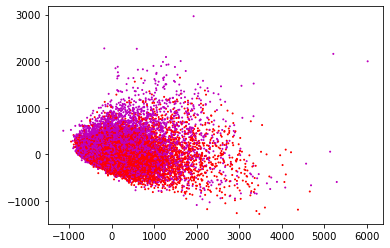

In [63]:
fig = plt.figure(1)
ax = fig.add_subplot(1, 1, 1)
colors = ['red','green', 'c', 'm']
ax.scatter(df['x'], df['y'], s=1, c=y_train, cmap=matplotlib.colors.ListedColormap(colors))

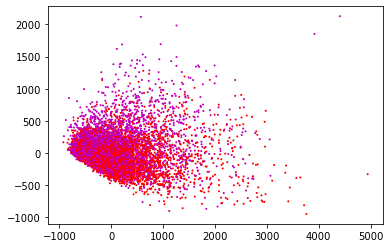

In [64]:
fig = plt.figure(1) #test with true labels
ax = fig.add_subplot(1, 1, 1)
colors = ['red','green', 'c', 'm']
ax.scatter(df_test['x'], df_test['y'], s=1, c=y_test, cmap=matplotlib.colors.ListedColormap(colors))

In [103]:
from sklearn.cluster import KMeans
different_labels_k = []
for c in clusters:
    kmeans = KMeans(n_clusters=c, random_state=0)
    kmeans.fit(final_x_wv)
    different_labels_k.append(kmeans.predict(final_x_vw_test))

In [112]:
analysis(different_labels[0], y_test.astype("int"))

Report: classification
               precision    recall  f1-score   support

    positive       0.28      0.46      0.35      3292
    negative       0.69      0.49      0.58      7958

    accuracy                           0.49     11250
   macro avg       0.48      0.48      0.46     11250
weighted avg       0.57      0.49      0.51     11250

Matrix: confusion
 [[1530 1762]
 [4024 3934]]
Accuracy
 0.4856888888888889


In [62]:
import matplotlib
import matplotlib.pyplot as plt

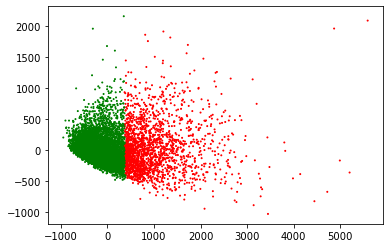

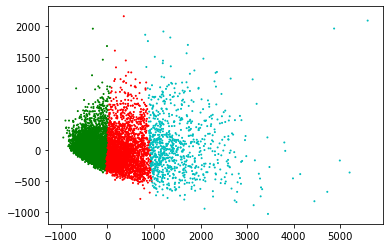

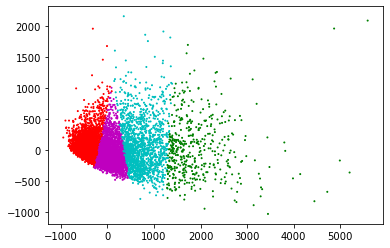

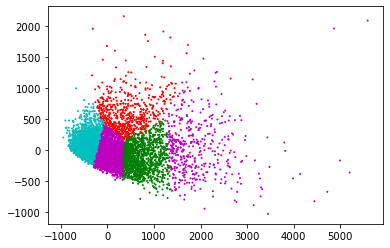

In [120]:
for i in range(0, len(different_labels)):
    fig = plt.figure(i)
    ax = fig.add_subplot(1, 1, 1)
    colors = ['red','green', 'c', 'm']
    ax.scatter(df_test['x'], df_test['y'], s=1, c=different_labels[i], cmap=matplotlib.colors.ListedColormap(colors[0:clusters[i]]))

In [67]:
from sklearn.mixture import GaussianMixture
different_labels = []
for c in clusters:
    gm = GaussianMixture(n_components=c, random_state=0)
    gm.fit(final_x_wv)
    different_labels.append(gm.predict(final_x_vw_test))

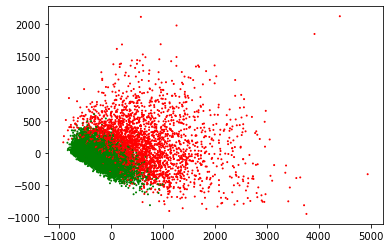

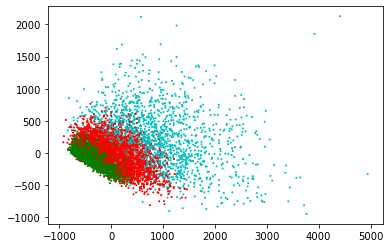

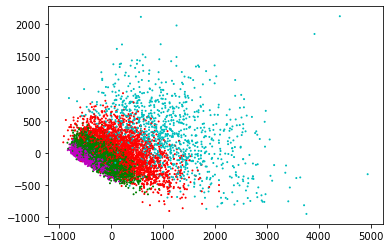

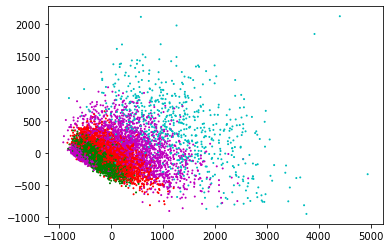

In [68]:
for i in range(0, len(different_labels)):
    fig = plt.figure(i)
    ax = fig.add_subplot(1, 1, 1)
    colors = ['red','green', 'c', 'm']
    ax.scatter(df_test['x'], df_test['y'], s=1, c=different_labels[i], cmap=matplotlib.colors.ListedColormap(colors[0:clusters[i]]))

In [204]:
from sklearn.cluster import Birch
different_labels_b = []
for c in clusters:
    brc = Birch(n_clusters=c)
    brc.fit(final_x_wv[0:2000])
    different_labels_b.append(brc.predict(final_x_vw_test))

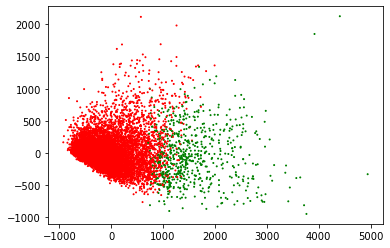

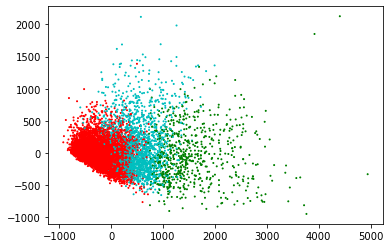

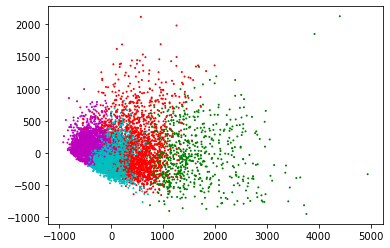

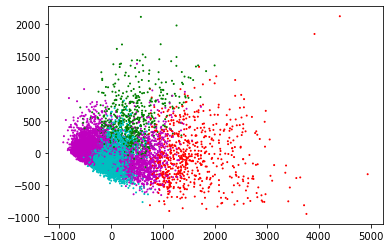

In [205]:
for i in range(0, len(different_labels)):
    fig = plt.figure(i)
    ax = fig.add_subplot(1, 1, 1)
    colors = ['red','green', 'c', 'm']
    ax.scatter(df_test['x'], df_test['y'], s=1, c=different_labels_b[i], cmap=matplotlib.colors.ListedColormap(colors[0:clusters[i]]))

In [197]:
pp = brc.predict(final_x_vw_test)

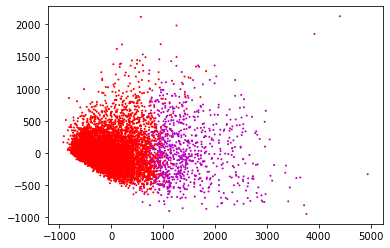

In [200]:
fig = plt.figure(i)
ax = fig.add_subplot(1, 1, 1)
colors = ['red','green', 'c', 'm']
ax.scatter(df_test['x'], df_test['y'], s=1, c=pp, cmap=matplotlib.colors.ListedColormap(colors))

In [109]:
# true_labels = []
# for i in range(0, len(different_labels[0])):
#     if different_labels[0][i] == 1:
#         true_labels.append(0)
#     else:
#         true_labels.append(1)

In [206]:
adjusted_rand_score(y_test.astype("int"), different_labels_b[0])

0.0011208845498332242

In [172]:
from sklearn.metrics import adjusted_rand_score
adjusted_rand_score(y_test.astype("int"), different_labels[0])

0.0007183046509708854

In [195]:
from sklearn.metrics import normalized_mutual_info_score
normalized_mutual_info_score(y_test.astype("int"), different_labels_k[0])

0.0022104664860715688

In [175]:
adjusted_rand_score(y_test.astype("int"), different_labels_k[0])

0.001934062663532475

In [173]:
from sklearn.metrics import mutual_info_score
mutual_info_score(y_test.astype("int"), different_labels[0])

0.0006928427678433713

In [176]:
mutual_info_score(y_test.astype("int"), different_labels_k[0])

0.0012535648757995288

In [207]:
mutual_info_score(y_test.astype("int"), different_labels_b[0])

0.0013347599585504105

In [174]:
from sklearn.metrics import adjusted_mutual_info_score
adjusted_mutual_info_score(y_test.astype("int"), different_labels[0])

0.0009994758840148668

In [193]:
adjusted_mutual_info_score(y_test.astype("int"), preds)

0.017272586288435053

In [177]:
adjusted_mutual_info_score(y_test.astype("int"), different_labels_k[0])

0.002132240445662965

In [87]:
df_labels = pd.DataFrame(X_test_3["comment"])
df_labels.insert(1, "label", different_labels[1])
df_labels

,comment,label
44089,gang bandit lead by shrewd rug ruthless monete...,0
28886,base on elmor leonard thi violent intellig act...,1
13236,thi great game okay perhap it didnt have some ...,0
5549,i first saw thi movi on televis some year ago ...,0
34984,superhero movi pretti much alway suck thi no e...,1
...,...,...
34193,what garbag there actual no part ii if thi mov...,1
7667,it pain me say thi about an australian film bu...,1
7388,br br burn paradis combin neoshaw brother acti...,1
16833,visual speak thi film stun it ha some delight ...,1


In [92]:
label_2 = df_labels[df_labels["label"] == 2]

In [93]:
label_0 = df_labels[df_labels["label"] == 0]

In [94]:
label_1 = df_labels[df_labels["label"] == 1]

In [111]:
from sklearn.mixture import GaussianMixture
gm = GaussianMixture(n_components=2)
gm.fit(final_x_wv)

GaussianMixture(n_components=2)

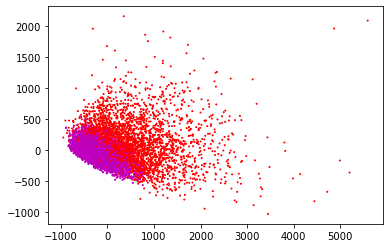

In [124]:
p = gm.predict(final_x_vw_test)
fig = plt.figure(1)
ax = fig.add_subplot(1, 1, 1)
colors = ['red','green', 'c', 'm']
ax.scatter(df_test['x'], df_test['y'], s=1, c=p, cmap=matplotlib.colors.ListedColormap(colors))

In [129]:
analysis(p, y_test.astype("int"))

Report: classification
               precision    recall  f1-score   support

    positive       0.29      0.47      0.35      3387
    negative       0.68      0.49      0.57      7863

    accuracy                           0.49     11250
   macro avg       0.48      0.48      0.46     11250
weighted avg       0.56      0.49      0.51     11250

Matrix: confusion
 [[1586 1801]
 [3973 3890]]
Accuracy
 0.48675555555555555


In [178]:
from sklearn.cluster import MeanShift
clustering = MeanShift(bandwidth=2, min_bin_freq=1000).fit(final_x_wv)
preds = clustering.predict(final_x_vw_test)

In [185]:
preds_s = set(preds)

In [187]:
len(preds_s)

7410

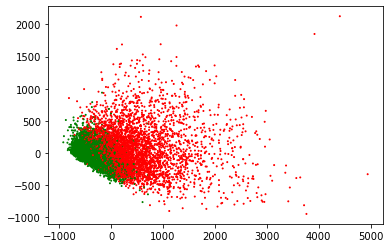

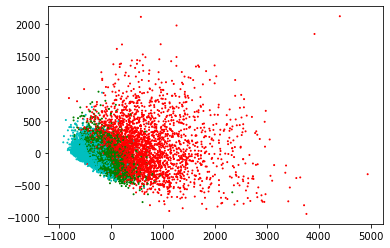

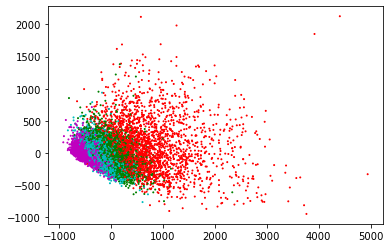

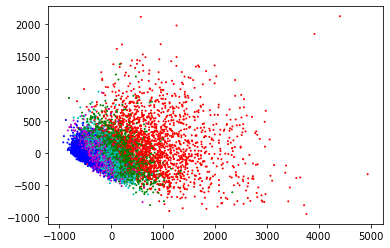

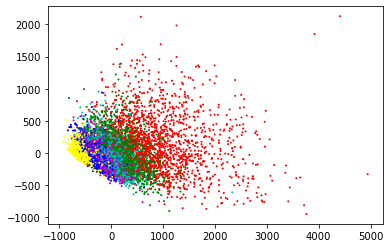

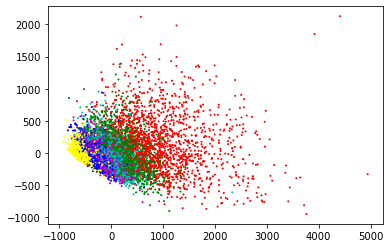

In [190]:
for i in range(0, 6):
    fig = plt.figure(i)
    ax = fig.add_subplot(1, 1, 1)
    colors = ['red','green', 'c', 'm', 'blue','yellow']
    ax.scatter(df_test['x'], df_test['y'], s=1, c=preds, cmap=matplotlib.colors.ListedColormap(colors[0:i+2]))

In [ ]:
from sklearn.cluster import AgglomerativeClustering
agglo = AgglomerativeClustering(n_clusters=2)
agglo.fit(final_x_wv)

In [74]:
agglo_preds = agglo.transform(final_x_vw_test)

In [75]:
agglo_preds

array([[  75.34673922, -140.04778141],
       [  16.22496503,  -38.46389933],
       [  19.16584776,  -72.60384755],
       ...,
       [  90.43674256, -236.18317079],
       [  31.12536634,  -88.80756737],
       [  30.27860434,  -72.35844447]])

In [66]:
from sklearn.cluster import MiniBatchKMeans
cluster = MiniBatchKMeans(n_clusters=2, random_state=0, batch_size=6)
cluster.fit(final_x_wv)
predictions = cluster.predict(final_x_vw_test)

C:\Users\USER\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:887: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1024 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(


In [71]:
different_labels_batch = []
for c in clusters:
    cluster = MiniBatchKMeans(n_clusters=c, random_state=0, batch_size=6)
    cluster.fit(final_x_wv)
    predictions = cluster.predict(final_x_vw_test)
    different_labels_batch.append(predictions)

C:\Users\USER\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:887: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1024 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(
C:\Users\USER\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:887: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1024 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(
C:\Users\USER\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:887: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1024 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(
C:\Users\USER

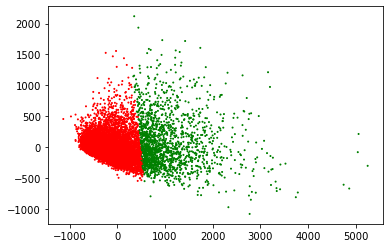

In [69]:
fig = plt.figure(1)
ax = fig.add_subplot(1, 1, 1)
colors = ['red','green']
ax.scatter(df_test['x'], df_test['y'], s=1, c=predictions, cmap=matplotlib.colors.ListedColormap(colors))

In [43]:
clustering_2 = MeanShift(bandwidth=2, min_bin_freq=2000).fit(final_x_wv)
preds_2 = clustering_2.predict(final_x_vw_test)

In [59]:
def mostFrequent(arr, n):
 
    # Sort the array
    arr.sort()
 
    # find the max frequency using
    # linear traversal
    max_count = 1; res = arr[0]; curr_count = 1
     
    for i in range(1, n):
        if (arr[i] == arr[i - 1]):
            curr_count += 1
             
        else :
            if (curr_count > max_count):
                max_count = curr_count
                res = arr[i - 1]
             
            curr_count = 1
     
    # If last element is most frequent
    if (curr_count > max_count):
     
        max_count = curr_count
        res = arr[n - 1]
     
    return res, max_count
 

In [54]:
preds_2

array([28650, 26921, 29900, ...,  3097, 17400, 15088], dtype=int64)

In [55]:
labels = clustering.labels_
new_labels = []
acc = 0
for i in range(0, len(preds)):
    if y_test[i] == 0 and preds_2[i] == 0:
        acc = acc + 1
    elif y_test[i] == 1 and preds_2[i] == 1:
        acc = acc + 1
        
acc

1

In [62]:
xx, yy = mostFrequent(preds, len(preds))
print(xx)
print(yy)

30293
16


In [64]:
xx_2, yy_2 = mostFrequent(preds_2, len(preds_2))
print(xx_2)

30293


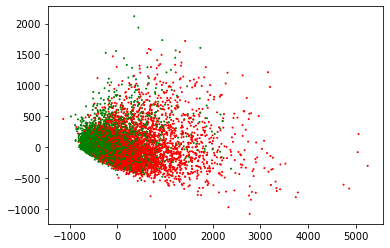

In [42]:
fig = plt.figure(1)
ax = fig.add_subplot(1, 1, 1)
colors = ['red','green']
ax.scatter(df_test['x'], df_test['y'], s=1, c=preds, cmap=matplotlib.colors.ListedColormap(colors))

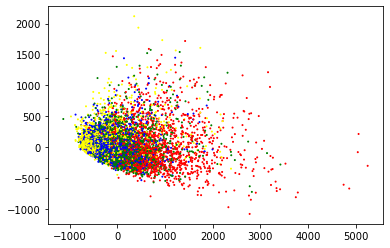

In [58]:
fig = plt.figure(1)
ax = fig.add_subplot(1, 1, 1)
colors = ['red','green', 'blue', 'yellow']
ax.scatter(df_test['x'], df_test['y'], s=1, c=preds_2, cmap=matplotlib.colors.ListedColormap(colors))

In [33]:
from sklearn.cluster import Birch
brc = Birch(n_clusters=2)

In [ ]:
brc.fit(final_x_wv)

In [ ]:
preds = brc.predict(final_x_vw_test)

In [ ]:
fig = plt.figure(1)
ax = fig.add_subplot(1, 1, 1)
colors = ['red','green', 'c', 'm']
ax.scatter(df_test['x'], df_test['y'], s=1, c=preds, cmap=matplotlib.colors.ListedColormap(colors))

In [14]:
# stemmer = PorterStemmer()
# def stemSentence(sentence):
#     token_words=word_tokenize(sentence)
#     stem_sentence=[]
#     for word in token_words:
#         stem_sentence.append(stemmer.stem(word))
#         stem_sentence.append(" ")
#     return "".join(stem_sentence)
# lemmatizer = WordNetLemmatizer()
# def lemmSentence(sentence):
#     token_words=word_tokenize(sentence)
#     lem_sentence=[]
#     for word in token_words:
#         lem_sentence.append(lemmatizer.lemmatize(word))
#         lem_sentence.append(" ")
#     return "".join(lem_sentence)

In [113]:
data_500 = pd.read_csv("dataset(1).csv")

In [121]:
data_500["comment"].to_numpy()[1]

'it hi train day i saw thi movi on tv onc my sisterinlaw kept ask question about it mostli my answer wa just it hi train day as if repeat thi help answer question what wa go on i also speak louder deaf peopl so they can hear me movi wa bleh denzel washington ha one most symmetr face hollywood'

In [123]:
d = complete_preprocess(data_500)
d

p


0      thi bad it ha everi clich gangbad coplarooki c...
1      it hi train day i saw thi movi on tv onc my si...
2      most mundan clich junk ive seen long time trai...
3      d headlin summar movi denzel get oscar for thi...
4      too much unbeliev denzel great actor i enjoy o...
                             ...                        
495    nike presto love watch thi my third lost first...
496    book for boe fan excel photographi interest te...
497    tragic symphoni when brahm wrote one greatest ...
498    if you love ventur i had thi vinyl album fabul...
499    sophmor slump i think not i stole thi cd from ...
Name: comment, Length: 500, dtype: object

In [125]:
# split train and test data
X_train_500, X_test_500, y_train_500, y_test_500 = train_test_split(d, data_500["sentiment"].to_numpy())

In [129]:
X_train_500 = X_train_500.to_numpy()
X_test_500 = X_test_500.to_numpy()

In [138]:
xx_vw_n = [] #each row is a sentence with its words are tokenized for train data
for i in range(0, len(X_train_500)):
    xx_vw_n.append(word_tokenize(X_train_500[i]))
    
xx_vw_test_n = [] #each row is a sentence with its words are tokenized for train data
for i in range(0, len(X_test_500)):
    xx_vw_test_n.append(word_tokenize(X_test_500[i]))

In [140]:
# create vector of each row of data! by summing the vector of each word in that row

final_x_wv_n = [] #contatining the vectors of each rows of train data
for i in range(0, len(xx_vw_n)):
    v = np.zeros((100, 1))
    for j in range(0, len(xx_vw_n[i])):
        if xx_vw_n[i][j] in mod.wv.index_to_key:
            v = v + mod.wv.get_vector(xx_vw_n[i][j]).reshape((100, 1)) 

    t = np.array(v)
    t = t.astype("float64") 
    final_x_wv_n.append(t)

In [147]:
# create vector of each row of the test data! by summing the vector of each word in that row

final_x_vw_test_n = [] #contatining the vectors of each rows of test data
#contatining the vectors of each rows of train data
for i in range(0, len(xx_vw_test_n)):
    v = np.zeros((100, 1))
    for j in range(0, len(xx_vw_test_n[i])):
        if xx_vw_test_n[i][j] in mod.wv.index_to_key:
            v = v + mod.wv.get_vector(xx_vw_test_n[i][j]).reshape((100, 1)) 

    t = np.array(v)
    t = t.astype("float64") 
    final_x_vw_test_n.append(t)

In [149]:
final_x_wv_n = np.array(final_x_wv_n)
final_x_wv_n = np.squeeze(final_x_wv_n, 2)
final_x_vw_test_n = np.squeeze(final_x_vw_test_n, 2)

In [164]:
kf = KFold(n_splits=9)
i = 0
total_acc = 0
best_layer_size_n = " "
lr_n = 0
# kf.get_n_splits(final_x_wv)
for train_index, test_index in kf.split(final_x_wv_n):
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_t, X_val = final_x_wv_n[train_index], final_x_wv_n[test_index]
    y_t, y_val = y_train_500[train_index], y_train_500[test_index]
    print("start to train")
    clf = MLPClassifier(random_state=1, max_iter=600, hidden_layer_sizes=parameters_mlp[i]["hidden_layer_sizes"],
                       learning_rate_init=parameters_mlp[i]["lr"])
    clf.fit(X_t,y_t.astype("int"))
    print("finished training")
    preds = clf.predict(X_val)
    if i == 5:
        analysis(y_val.astype("int"), preds)
    acc = accuracy_score(y_val.astype("int"), preds)
    print("the accuracy is:", acc)
    if acc > total_acc:
        best_layer_size_n = parameters_mlp[i]["hidden_layer_sizes"]
        total_acc = acc
        lr_n = parameters_mlp[i]["lr"]
        
    i = i + 1
    print(i)

print("the best layer size is:", best_layer_size_n) 
print("the best lr is:", lr_n) 

start to train
finished training
the accuracy is: 0.4523809523809524
1
start to train
finished training
the accuracy is: 0.7857142857142857
2
start to train
finished training
the accuracy is: 0.5
3
start to train
finished training
the accuracy is: 0.8095238095238095
4
start to train
finished training
the accuracy is: 0.7857142857142857
5
start to train
finished training
Report: classification
               precision    recall  f1-score   support

    positive       0.84      0.94      0.89        17
    negative       0.96      0.88      0.92        25

    accuracy                           0.90        42
   macro avg       0.90      0.91      0.90        42
weighted avg       0.91      0.90      0.91        42

Matrix: confusion
 [[16  1]
 [ 3 22]]
Accuracy
 0.9047619047619048
the accuracy is: 0.9047619047619048
6
start to train
finished training
the accuracy is: 0.7317073170731707
7
start to train
finished training
the accuracy is: 0.7073170731707317
8
start to train
finished train

In [165]:
clf = MLPClassifier(random_state=1, max_iter=600, hidden_layer_sizes=150,
                       learning_rate_init=0.01)
clf.fit(final_x_wv_n,y_train_500.astype("int"))
print("finished training")
preds = clf.predict(final_x_vw_test_n)
analysis(y_test_500.astype("int"), preds)

finished training
Report: classification
               precision    recall  f1-score   support

    positive       0.89      0.80      0.84        70
    negative       0.77      0.87      0.82        55

    accuracy                           0.83       125
   macro avg       0.83      0.84      0.83       125
weighted avg       0.84      0.83      0.83       125

Matrix: confusion
 [[56 14]
 [ 7 48]]
Accuracy
 0.832


In [163]:
#clf_1 = LogisticRegression(max_iter=4000, warm_start=True)
clf_1.fit(final_x_wv_n, y_train_500.astype("int"))
preds = clf_1.predict(final_x_vw_test_n)
analysis(y_test_500.astype("int"), preds)

Report: classification
               precision    recall  f1-score   support

    positive       0.90      0.80      0.85        70
    negative       0.78      0.89      0.83        55

    accuracy                           0.84       125
   macro avg       0.84      0.85      0.84       125
weighted avg       0.85      0.84      0.84       125

Matrix: confusion
 [[56 14]
 [ 6 49]]
Accuracy
 0.84
